In [1]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re

import nltk

In [2]:
#read in this dataset and have a look at it.
df = pd.read_csv('climate_tweets.csv')
df.head()

,tweet
0,Global warming report urges governments to act...
1,Fighting poverty and global warming in Africa ...
2,Carbon offsets: How a Vatican forest failed to...
3,Carbon offsets: How a Vatican forest failed to...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...


In [3]:
# number of our tweets are actually unique because people retweet each other and so there could be multiple copies of the same tweet.
df.tweet.unique().shape

(5541,)

In [4]:
# make a new column to highlight retweets
df['is_retweet'] = df['tweet'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

773

In [5]:
 # number of unique retweets
df.loc[df['is_retweet']].tweet.unique().size


677

In [6]:
# 10 most repeated tweets
df.groupby(['tweet']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)


,tweet,counts
3131,No matter if you believe in global warming or ...,20
4555,Take Action @change: Help Protect Wildlife Hab...,14
4027,RT @newtgingrich: Historic snow storm in washi...,9
1765,Fight Climate Change From All Fronts: [link],8
1626,Earth's polar ice sheets vulnerable to even mo...,7
1941,Global Warming Dent's El Ni'o's Protective Shi...,7
1799,Foes of California's global warming law pour m...,6
1351,Coalition of the Tired of Waiting: Fighting Cl...,6
4271,SCIENCE: Scientists explore the evolution of c...,6
1040,Carbon offsets: How a Vatican forest failed to...,6


<ipython-input-7-552d22529a9e>:15: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


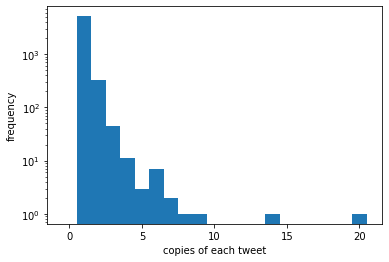

In [7]:
# number of times each tweet appears
counts = df.groupby(['tweet']).size()\
           .reset_index(name='counts')\
           .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()


In [8]:
# In this tutorial we are going to be using this package to extract from each tweet:
#who is being retweeted (if any)
#who is being tweeted at/mentioned (if any)
#what hashtags are being used (if any)

def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)   


In [9]:
# two sample tweets
my_tweet = 'RT @our_codingclub: Can @you find #all the #hashtags?'
my_other_tweet = 'Not a retweet. All views @my own'

In [10]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df.tweet.apply(find_retweeted)
df['mentioned'] = df.tweet.apply(find_mentioned)
df['hashtags'] = df.tweet.apply(find_hashtags)
df

,tweet,is_retweet,retweeted,mentioned,hashtags
0,Global warming report urges governments to act...,False,[],[],[]
1,Fighting poverty and global warming in Africa ...,False,[],[],[]
2,Carbon offsets: How a Vatican forest failed to...,False,[],[],[]
3,Carbon offsets: How a Vatican forest failed to...,False,[],[],[]
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,False,[],[],[]
...,...,...,...,...,...
6085,"@bloodless_coup ""The phrase 'global warming' s...",False,[],[@bloodless_coup],"[#p2, #tcot]"
6086,Virginia to Investigate Global Warming Scienti...,False,[],[],[]
6087,Global warming you tube parody you will enjoy ...,False,[],[],"[#IPCC, #ocra]"
6088,One-Eyed Golfer: Don't dare tell me about glob...,False,[],[],[]


In [11]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]
hashtags_list_df

,hashtags
12,"[#Climate, #population]"
16,[#EarthDay]
26,[#ac]
31,[#tcot]
36,"[#tornadocot, #ocra, #sgp, #gop, #ucot, #tlot,..."
...,...
6076,"[#liberalFascism, #News, #tcot]"
6083,[#climate]
6085,"[#p2, #tcot]"
6087,"[#IPCC, #ocra]"


In [12]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
     columns=['hashtag'])
flattened_hashtags_df

,hashtag
0,#Climate
1,#population
2,#EarthDay
3,#ac
4,#tcot
...,...
2062,#IPCC
2063,#ocra
2064,#tcot
2065,#p2


In [13]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

477

In [14]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
popular_hashtags

,hashtag,counts
0,#tcot,227
1,#climate,202
2,#p2,112
3,#green,50
4,#climatechange,47
...,...,...
472,#home,1
473,#hoth,1
474,#houston,1
475,#humanrights,1


<ipython-input-15-38b51c02b1bf>:15: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


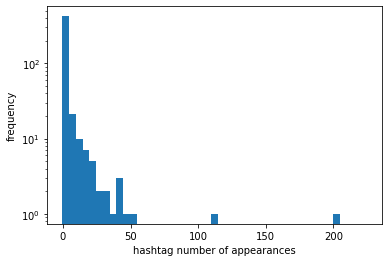

In [15]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()


***From Text to Vector***

In the following code block we are going to find what hashtags meet a minimum appearance threshold. These are going to be the hashtags we will look for correlations between.

In [16]:
# take hashtags which appear at least this amount of times
min_appearance = 10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])
popular_hashtags_set

{'#Climate',
 '#EarthDay',
 '#FoxNews',
 '#GlobalWarming',
 '#Green',
 '#IPCC',
 '#News',
 '#SaveTerra',
 '#SierraClub',
 '#TCOT',
 '#UN',
 '#agw',
 '#cleantech',
 '#climate',
 '#climatechange',
 '#climategate',
 '#cochabamba',
 '#du1',
 '#earthday',
 '#eco',
 '#energy',
 '#environment',
 '#fb',
 '#global',
 '#globalwarming',
 '#gop',
 '#green',
 '#news',
 '#ocra',
 '#p2',
 '#sgp',
 '#snowpocalypse',
 '#tcot',
 '#teaparty',
 '#tlot'}

Next we are going to create a new column in hashtags_df which filters the hashtags to only the popular hashtags. We will also drop the rows where no popular hashtags appear.

In [17]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]
popular_hashtags_list_df

,hashtags,popular_hashtags
12,"[#Climate, #population]",[#Climate]
16,[#EarthDay],[#EarthDay]
31,[#tcot],[#tcot]
36,"[#tornadocot, #ocra, #sgp, #gop, #ucot, #tlot,...","[#ocra, #sgp, #gop, #tlot, #p2]"
39,"[#tcot, #p2]","[#tcot, #p2]"
...,...,...
6076,"[#liberalFascism, #News, #tcot]","[#News, #tcot]"
6083,[#climate],[#climate]
6085,"[#p2, #tcot]","[#p2, #tcot]"
6087,"[#IPCC, #ocra]","[#IPCC, #ocra]"


Next we want to vectorise our the hashtags in each tweet like mentioned above. We do this using the following block of code to create a dataframe where the hashtags contained in each row are in vector form.

In [18]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))
hashtag_vector_df

,popular_hashtags,#p2,#Green,#tlot,#globalwarming,#gop,#earthday,#SaveTerra,#IPCC,#news,...,#GlobalWarming,#eco,#du1,#climate,#cochabamba,#climategate,#sgp,#tcot,#fb,#ocra
12,[#Climate],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,[#EarthDay],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,[#tcot],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36,"[#ocra, #sgp, #gop, #tlot, #p2]",1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
39,"[#tcot, #p2]",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6076,"[#News, #tcot]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6083,[#climate],0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6085,"[#p2, #tcot]",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6087,"[#IPCC, #ocra]",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
#Now satisfied we will drop the popular_hashtags column from the dataframe. We don’t need it.

hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)
hashtag_matrix 

,#p2,#Green,#tlot,#globalwarming,#gop,#earthday,#SaveTerra,#IPCC,#news,#News,...,#GlobalWarming,#eco,#du1,#climate,#cochabamba,#climategate,#sgp,#tcot,#fb,#ocra
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
39,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6076,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6085,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6087,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In the next code block we will use the pandas.DataFrame inbuilt method to find the correlation between each column of the dataframe and thus the correlation between the different hashtags appearing in the same tweets.

We will use the seaborn package that we imported earlier to plot the correlation matrix as a heatmap

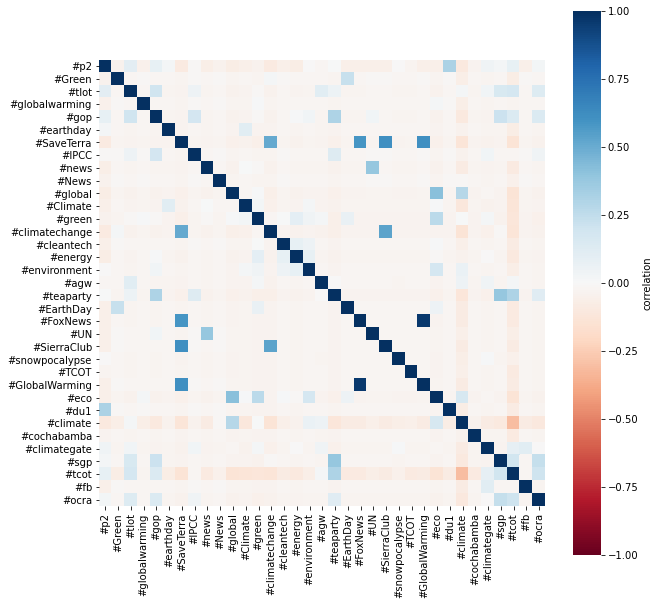

In [20]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()
# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

From the plot above we can see that there are fairly strong correlations between:

    #SaveTerra and #SierraClub
    #GloablWarming and #FoxNews

We can also see a fairly strong negative correlation between:

    #tcot and #climate

What these really mean is up for interpretation and it won’t be the focus of this tutorial.

**Introduction to Topic Modelling**

In [21]:
# imports for this specific cleaning task
import nltk; nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\menna\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


**Cleaning Unstructured Text Data**

In [22]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet


In [23]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet


In [24]:
df['clean_tweet'] = df.tweet.apply(clean_tweet)
df['clean_tweet']

0       global warm report urg govern act brussel belg...
1                       fight poverti global warm africa 
2       carbon offset vatican forest fail reduc global...
3       carbon offset vatican forest fail reduc global...
4                  uruguay tool need vulner climat chang 
                              ...                        
6085     phrase global warm abandon favor climat chang...
6086        virginia investig global warm scientist mann 
6087           global warm tube parodi enjoy #ipcc #ocra 
6088    one eye golfer dare tell global warm twenti fi...
6089    man made global warm hair brain theori  scient...
Name: clean_tweet, Length: 6090, dtype: object

# Applying Topic Modelling

# 1- Using NFM

Next we actually create the model object. Lets start by arbitrarily choosing 10 topics. We also define the random state so that this model is reproducible.

In [25]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel

# use tfidf by removing tokens that don't appear in at least 50 documents
vect = TfidfVectorizer(min_df=50, stop_words='english')
 
# Fit and transform
X = vect.fit_transform(df.clean_tweet)
print(X)


  (0, 62)	0.5322997315396347
  (0, 133)	0.4328475784383195
  (0, 50)	0.54661904873765
  (0, 96)	0.42008355201444975
  (0, 127)	0.16544575762500605
  (0, 46)	0.16329450637076842
  (1, 44)	0.8895307735013904
  (1, 127)	0.3251667095049166
  (1, 46)	0.3209386452637998
  (2, 45)	0.7132461555478172
  (2, 17)	0.6328045557067521
  (2, 127)	0.21450774229332542
  (2, 46)	0.21171854989409736
  (3, 45)	0.7132461555478172
  (3, 17)	0.6328045557067521
  (3, 127)	0.21450774229332542
  (3, 46)	0.21171854989409736
  (4, 19)	0.27836194645509676
  (4, 21)	0.28093957781081424
  (4, 80)	0.9184702392485078
  (5, 129)	0.674764672125183
  (5, 84)	0.6766530000881733
  (5, 127)	0.20972573492652094
  (5, 46)	0.20699872181489312
  (6, 71)	0.6065123592692256
  :	:
  (6084, 32)	0.640334791270042
  (6084, 131)	0.6934586223458095
  (6084, 127)	0.2350682246386555
  (6084, 46)	0.23201168924999052
  (6085, 115)	0.609227209655274
  (6085, 101)	0.6309794241215669
  (6085, 19)	0.2321534533376165
  (6085, 21)	0.234303194091

# Build the NMF Model

In [43]:
# Create an NMF instance: model
# the 10 components will be the topics
model = NMF(n_components=10, random_state=0, alpha=.1, l1_ratio=.5)#'random': non-negative random matrices, scaled with: sqrt(X.mean() / n_components)
 
# Fit the model to TF-IDF
model.fit(X)
 
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X)
nmf_features

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        1.05208939, 0.        , 0.        , 0.        , 0.        ]])

In [27]:
#TF-IDF Dimensions
X.shape

(6090, 136)

In [28]:
#Features Dimensions
nmf_features.shape

(6090, 10)

In [29]:
#Components Dimensions
model.components_.shape

(10, 136)

In [30]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())
components_df

,action,agenc,air,al,allergi,anoth,april,ask,bad,believ,...,want,warm,washington,water,way,weather,winter,world,wors,year
0,0.196728,0.019632,0.035944,0.000000,0.111068,0.014823,0.053208,0.047353,0.002122,0.033216,...,0.058180,0.000000,0.068949,0.060133,0.035143,0.066765,0.000527,0.000000,0.041916,0.066342
1,0.011749,0.000000,0.145412,0.006282,0.029651,0.056818,0.120990,0.016025,0.032851,0.169618,...,0.049629,7.146451,0.027707,0.102522,0.100944,0.125823,0.085404,0.000000,0.106203,0.121814
2,0.193814,1.187986,0.005647,0.000000,0.065211,0.000000,0.010845,0.000000,0.000000,0.000000,...,0.000236,0.002236,0.024346,0.000000,0.014703,0.047707,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,1.133837,0.000000,0.137662,0.000000,0.047422,0.025569,0.044882,...,0.091651,0.195890,0.586712,0.000000,0.000000,0.232872,0.325356,0.000000,0.018282,0.294909
4,0.000000,0.000000,0.008855,0.000000,0.000000,0.039376,0.000000,0.018089,0.000000,0.000000,...,0.000000,0.006366,0.000000,0.006995,0.013187,0.037340,0.051021,0.014128,0.028075,0.000000
5,0.000000,0.000000,0.001483,0.018663,0.000000,0.000000,0.032365,0.012430,0.284009,0.000000,...,0.000000,0.000000,0.000000,0.028962,0.000000,0.000000,0.002246,0.000000,0.000000,0.098966
6,0.000000,0.000000,0.010478,0.000000,0.000000,0.021333,0.000000,0.000000,0.011091,0.000000,...,0.000000,0.024546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.022697,0.000000,0.049679,0.000000,0.000000,0.018780,0.019386,0.000000,0.000000,0.014421,...,0.050793,0.000000,0.000000,0.016545,0.003466,0.014961,0.078323,2.838871,0.000000,0.013892
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.011158,0.000000,0.000000,0.073489,0.278842,...,0.017348,0.020716,0.000000,0.000000,0.017607,0.034868,0.052943,0.030633,0.000000,0.000000
9,0.011339,0.000000,0.000000,0.000000,0.000000,0.000000,0.009969,0.028268,0.000000,0.000000,...,0.030766,0.000000,0.055248,0.000000,0.038578,0.000000,0.000000,0.000000,0.000000,0.000000


# Get the Words of the Highest Value for each Topic

In [31]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10)) # Return the first n rows ordered byAnd columns in descending order. 
    # And This method is equivalent to df.sort_values(columns, ascending=False).head(n) , but more performant.
    print('\n')

For topic 1 the words with the highest value are:
climat    7.560713
chang     7.275189
senat     0.310623
legisl    0.276474
graham    0.245073
nation    0.198604
action    0.196728
issu      0.194795
immigr    0.193256
talk      0.189218
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
global        7.237711
warm          7.146451
great         0.263994
effect        0.235781
volcano       0.228066
caus          0.212576
think         0.202117
like          0.192597
stop          0.192497
california    0.191930
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
new       5.076854
agenc     1.187986
feder     0.867328
obama     0.670618
report    0.619394
studi     0.536296
india     0.264020
action    0.193814
time      0.191603
post      0.157772
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
snow          4.006290
tcot          1.883078
dc            1.874735
gore          1.175751
al            1.1338

# Get the Topic of a Document

In [32]:
my_document = df.clean_tweet[10]
my_document

'solv global warm thing '

# We will need to work with the Features matrix:

In [33]:
pd.DataFrame(nmf_features).loc[0]

0    0.000000
1    0.023076
2    0.008020
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.047388
8    0.008107
9    0.000663
Name: 0, dtype: float64

In [34]:
# If we see the most important words of Topic 10 we will see that it contains the “funding“!
pd.DataFrame(nmf_features).loc[0].idxmax()

7

In [35]:
# Finally, if we want to see the number of documents for each topic we can easily get it by typing:
pd.DataFrame(nmf_features).idxmax()

0      19
1      16
2    3395
3    3916
4      12
5    2897
6     413
7    2317
8    4284
9     362
dtype: int64

# How to Predict the Topic of a New Document

In [36]:
my_news = """15-year-old girl stabbed to death in grocery store during fight with 4 younger girls
Authorities said they gathered lots of evidence from videos on social media"""
 
# Transform the TF-IDF
X = vect.transform([my_news])
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X)
 
pd.DataFrame(nmf_features)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.000053,0.0,0.004383,0.0,0.001108,0.0,0.0,0.0,0.071981


In [37]:
# And if we want to get the index of the topic with the highest score:
pd.DataFrame(nmf_features).idxmax(axis=1)
#As expected, this document was classified as Topic 10 (with index 9).

0    9
dtype: int64

In [41]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
CoherenceModel(
    model=model,
    corpus=common_corpus,
    coherence='C_v'
).get_coherence()

AttributeError: 'NMF' object has no attribute 'id2word'

# 2- Using LDA

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [45]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

lda = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)


In [54]:
lda.fit(tf)

LatentDirichletAllocation(random_state=0)

In [55]:
#this function, which returns a dataframe, to show you the topics we created. Remember that each topic is a list of words/tokens and weights
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)


In [56]:
#You can apply this function like so
no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,climat,1220.2,global,666.5,global,1147.2,global,473.1,climat,422.0,global,783.0,chang,666.1,warm,167.9,climat,568.3,climat,529.9
1,chang,1184.5,warm,658.1,warm,1102.1,warm,450.7,chang,401.8,warm,764.7,climat,661.6,#climate,139.2,chang,550.5,chang,520.6
2,via,257.9,snow,160.5,scientist,150.2,believ,101.3,legisl,123.2,gore,137.1,energi,178.8,volcano,128.9,new,321.1,peopl,153.4
3,scienc,112.9,#tcot,121.6,say,87.1,california,87.1,us,105.1,snow,123.7,u,109.8,global,128.6,bill,116.9,world,151.3
4,news,79.5,like,99.0,scienc,71.7,blame,82.1,via,60.5,al,122.1,via,96.5,chang,122.0,senat,106.1,confer,110.1
5,day,77.8,blizzard,90.9,debat,66.6,law,78.6,say,55.9,great,94.1,nation,89.0,help,114.1,agenc,95.1,bill,106.4
6,earth,68.2,dc,86.5,man,61.1,report,77.8,video,55.9,cold,77.1,make,74.5,take,96.8,immigr,77.7,talk,94.8
7,trial,68.1,think,83.3,made,54.0,save,61.8,place,54.1,call,76.5,impact,67.5,climat,76.7,obama,75.6,graham,92.1
8,clinic,68.1,due,80.1,show,51.9,money,56.1,good,52.6,#tcot,75.3,report,63.4,iceland,67.1,feder,67.1,un,77.6
9,carbon,64.5,make,70.4,water,50.6,live,49.3,human,48.2,one,72.1,issu,58.8,could,64.5,via,58.6,put,68.8


In [57]:
lda.score(tf)

-188072.3886392263

In [58]:
#The most common measure for how well a probabilistic topic model fits the data is perplexity (which is based on the log likelihood). 
#The lower (!) the perplexity, the better the fit.
# Perplexity is defined as 2**Cross Entropy for the text
model.perplexity(tf)

AttributeError: 'NMF' object has no attribute 'perplexity'

In [59]:
from gensim.test.utils import common_corpus, common_dictionary
CoherenceModel( model=lda, corpus=common_corpus, coherence='C_v').get_coherence()

AttributeError: 'LatentDirichletAllocation' object has no attribute 'id2word'

# Summary

I found that my topics almost all had global warming or climate change at the top of the list. This could indicate that we should add these words to our stopwords like since they don’t tell us anything we didn’t already know. We already knew that the dataset was tweets about climate change.

This result also may have come from the fact that tweets are very short and this particular method, LDA (which works very well for longer text documents), does not work well on shorter text documents like tweets. In the bonus section to follow I suggest replacing the LDA model with an NMF model and try creating a new set of topics. In my own experiments I found that NMF generated better topics from the tweets than LDA did, even without removing ‘climate change’ and ‘global warming’ from the tweets.